In [6]:
import pandas as pd
import os
def get_videos_from_folder(video_folder_name):
    video_files = []
    for root, dirs, files in os.walk(video_folder_name):
        for filename in files:
            if '.mp4' in filename:
                video_files.append({"file_name": filename, "label": 'Side', "file_path": video_folder_name + filename})
    data = pd.DataFrame(video_files, columns=['file_name', 'label', 'file_path'])
    return data

training = get_videos_from_folder('../WS2020_DeepLearning_Videos/Task2_Training_Validation/')
test = get_videos_from_folder('../WS2020_DeepLearning_Videos/Task2_Test/')

display(training)
display(test)

,file_name,label,file_path
0,_8Vy3dlHg2w_00150.mp4,Side,../WS2020_DeepLearning_Videos/Task2_Training_V...
1,_lmT4WlK7G0_00054.mp4,Side,../WS2020_DeepLearning_Videos/Task2_Training_V...
2,_tigfCJFLZg_00264.mp4,Side,../WS2020_DeepLearning_Videos/Task2_Training_V...
3,_tigfCJFLZg_00273.mp4,Side,../WS2020_DeepLearning_Videos/Task2_Training_V...
4,_lmT4WlK7G0_00016.mp4,Side,../WS2020_DeepLearning_Videos/Task2_Training_V...
...,...,...,...
295,_tigfCJFLZg_00286.mp4,Side,../WS2020_DeepLearning_Videos/Task2_Training_V...
296,_8Vy3dlHg2w_00192.mp4,Side,../WS2020_DeepLearning_Videos/Task2_Training_V...
297,_tigfCJFLZg_00179.mp4,Side,../WS2020_DeepLearning_Videos/Task2_Training_V...
298,_tigfCJFLZg_00022.mp4,Side,../WS2020_DeepLearning_Videos/Task2_Training_V...


,file_name,label,file_path
0,_tigfCJFLZg_00351.mp4,Side,../WS2020_DeepLearning_Videos/Task2_Test/_tigf...
1,_tigfCJFLZg_00317.mp4,Side,../WS2020_DeepLearning_Videos/Task2_Test/_tigf...
2,_tigfCJFLZg_00374.mp4,Side,../WS2020_DeepLearning_Videos/Task2_Test/_tigf...
3,_tigfCJFLZg_00377.mp4,Side,../WS2020_DeepLearning_Videos/Task2_Test/_tigf...
4,_tigfCJFLZg_00354.mp4,Side,../WS2020_DeepLearning_Videos/Task2_Test/_tigf...
...,...,...,...
87,_tigfCJFLZg_00358.mp4,Side,../WS2020_DeepLearning_Videos/Task2_Test/_tigf...
88,_tigfCJFLZg_00293.mp4,Side,../WS2020_DeepLearning_Videos/Task2_Test/_tigf...
89,_tigfCJFLZg_00340.mp4,Side,../WS2020_DeepLearning_Videos/Task2_Test/_tigf...
90,_tigfCJFLZg_00308.mp4,Side,../WS2020_DeepLearning_Videos/Task2_Test/_tigf...


In [2]:
def encode_position(label):
    if label == 'Side':
        return 0
    if label == 'Front':
        return 1
    if label == 'Upwards':
        return 2
    if label == 'Downwards':
        return 3
        

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

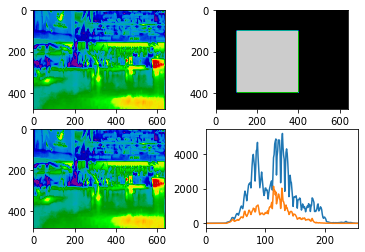

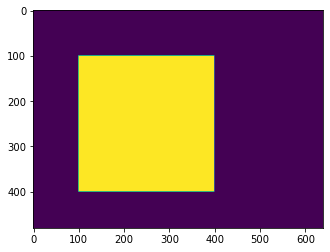

In [172]:
img = cv2.imread('/home/dl6/deep-learning-team6/1b/videoframes/all/Frames_video10/frame47.jpg',0)

# create a mask
mask = np.zeros(img.shape[:3], np.uint8)
mask[100:400, 100:400] = 255
masked_img = cv2.bitwise_and(img,img)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'nipy_spectral')
plt.subplot(222), plt.imshow(mask,'nipy_spectral')
plt.subplot(223), plt.imshow(masked_img, 'nipy_spectral')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()
plt.imshow(mask)

[[195 202 213 ... 145 145 145]
 [195 202 213 ... 145 145 145]
 [195 203 213 ... 145 145 145]
 ...
 [152 158 167 ... 130 130 130]
 [155 161 170 ... 134 134 134]
 [156 162 172 ... 138 138 138]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


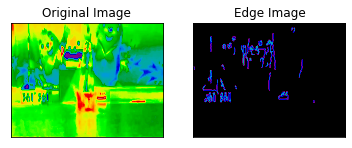

(<AxesSubplot:title={'center':'Edge Image'}>, <matplotlib.image.AxesImage object at 0x7f19129c6b20>)
[195 202 213 215 215 215 217 219 218 214 207 200 193 187 182 178 178 180
 181 184 186 188 188 189 189 189 190 192 193 193 193 193 193 192 192 192
 192 192 192 192 193 193 193 193 193 193 192 191 190 189 188 188 188 188
 188 188 187 187 187 186 186 185 185 185 185 185 185 185 178 163 150 146
 149 160 170 171 166 166 173 179 181 181 181 181 181 181 181 181 181 181
 181 181 181 181 182 183 185 186 187 187 186 186 186 186 186 186 186 186
 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185
 185 185 185 185 185 185 185 185 185 185 185 184 182 181 179 178 177 176
 176 175 175 176 178 180 182 184 185 185 186 186 187 187 188 188 188 188
 188 188 188 186 184 183 182 182 182 182 182 182 183 184 184 185 185 185
 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185
 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185
 185 186 186 186 186 18

[147 151 156 156 156 156 155 154 153 152 152 153 152 150 148 147 146 146
 146 146 146 148 150 151 152 152 151 151 150 149 149 148 148 147 146 145
 144 143 143 143 144 144 145 146 146 146 145 145 144 144 143 142 142 141
 141 141 141 141 141 141 141 141 142 142 142 143 143 143 146 156 174 190
 195 191 181 160 139 133 135 133 131 130 131 132 132 134 135 137 139 140
 142 143 143 144 145 145 145 145 144 144 143 143 142 142 141 141 140 139
 138 138 138 138 139 141 144 149 154 159 162 165 166 166 168 174 179 171
 149 130 121 117 114 113 114 117 123 136 156 174 184 189 192 196 199 202
 206 209 210 203 188 172 160 153 148 144 139 137 139 146 159 172 180 185
 187 184 180 176 174 171 163 148 130 115 111 121 137 146 147 145 143 142
 140 138 137 136 136 136 136 135 133 132 132 132 133 135 138 139 139 140
 139 135 128 118 102  86  78  76  76  72  78 117 182 232 249 251 250 249
 247 245 235 206 156 117 109 117 125 131 137 143 153 168 184 194 194 190
 187 183 177 164 139 124 132 133 109  83  72  70  7

[186 193 202 206 206 199 187 180 178 178 178 179 180 182 183 184 184 184
 184 182 179 175 171 167 163 159 155 152 152 155 159 162 165 166 168 170
 172 173 174 175 171 160 140 116  95  82  77  78  81  85  90  94  97  94
  81  64  52  46  42  39  35  32  29  27  26  25  25  24  25  26  28  30
  34  43  54  67  79  86  87  87  87  88  88  88  87  86  86  85  84  86
  90  93  94  94  91  84  73  64  64  79 110 144 164 169 170 169 168 167
 166 166 166 166 166 165 165 164 164 164 164 164 164 164 165 166 163 157
 159 168 163 139 121 118 118 115 112 111 112 114 117 119 118 113 107 104
 102 101 100 100 102 103 102  99  96  95  96  97  99 102 104 105 105 104
 100  96  95  96  96  95  95  95  97 101 107 114 119 122 121 112 105 115
 136 150 152 151 150 146 143 147 157 165 165 157 145 136 132 132 135 140
 143 139 129 118 113 117 125 129 129 128 127 125 124 123 122 122 122 123
 123 124 124 125 126 127 127 127 126 126 125 125 125 125 125 125 125 125
 125 125 126 127 130 132 135 139 143 146 148 150 15

[150 156 162 162 161 161 162 162 163 163 163 163 162 162 162 162 162 162
 162 162 162 163 163 163 163 164 164 165 165 165 165 165 165 164 164 164
 164 164 164 164 164 163 163 163 163 163 163 163 162 162 162 162 162 162
 162 161 161 160 159 158 158 157 157 156 156 156 155 155 155 155 155 155
 154 154 153 153 153 153 153 152 152 152 151 151 151 151 151 151 151 151
 151 151 151 151 151 151 151 151 151 150 150 150 149 149 149 149 149 149
 149 149 149 149 149 148 148 148 148 148 148 148 149 149 149 149 150 150
 150 151 151 151 151 151 151 151 150 150 150 150 150 150 149 149 149 149
 149 149 149 149 149 149 149 149 149 149 149 149 149 149 149 149 149 150
 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150
 150 150 150 150 151 151 151 151 151 151 151 151 150 150 149 149 148 148
 148 148 147 146 146 145 145 145 144 144 143 143 142 142 142 142 142 142
 141 141 141 142 142 143 143 143 143 143 143 143 144 144 144 145 145 146
 146 147 147 148 149 149 150 150 150 150 150 150 15

In [37]:
img = cv2.imread('/home/dl6/deep-learning-team6/1b/videoframes/all/Frames_video100/frame85.jpg',0)


blur = cv2.GaussianBlur(img, (5,5), 0)
print(blur)
im_bw = cv2.Canny(blur, 100, 200)
print(im_bw)

plt.subplot(121),plt.imshow(img,cmap = 'nipy_spectral')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
image=plt.subplot(122),plt.imshow(im_bw,cmap = 'nipy_spectral')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

print(image)
for x in blur:
     print (x)


list_of_pixels = list(blur)
# Do something to the pixels...
im2 = Image.new(mode = "RGB", size = (200, 200) )
im2.putdata(blur)

In [4]:
#!/usr/bin/env python
# coding: utf8
from __future__ import absolute_import, division, print_function
from collections import Counter
from PIL import Image

# Farbwert entspricht Absolutwert (001) entsprechend EBSD-Orientierungsdreieck
RED = (254, 3, 4)
# Farbwert entspricht Absolutwert (111) entsprechend EBSD-Orientierungsdreieck
BLUE = (1, 3, 254)
# Farbwert entspricht Absolutwert (011) entsprechend EBSD-Orientierungsdreieck
GREEN = (4, 254, 4)
# Schwarzfarbauswahl entspricht dem Schwarz der Korngrenzen
BLACK = (0, 0, 0)


def main():
    histogram = Counter(Image.open('/home/dl6/deep-learning-team6/1b/videoframes/all/Frames_video100/frame85.jpg').convert('BGR').getdata())
    for text, color in [
        ('schwarze', BLACK), ('grüne', GREEN), ('rote', RED), ('blaue', BLUE)
    ]:
        print('{0} Pixel: {1}'.format(text, histogram[color]))


if __name__ == '__main__':
    main()


ValueError: conversion from RGB to BGR not supported

In [6]:
from __future__ import absolute_import, division, print_function
from collections import Counter
from PIL import Image
import matplotlib.image as ig

# Farbwert entspricht Absolutwert (001) entsprechend EBSD-Orientierungsdreieck
RED = (254, 3, 4)
# Farbwert entspricht Absolutwert (111) entsprechend EBSD-Orientierungsdreieck
BLUE = (1, 3, 254)
# Farbwert entspricht Absolutwert (011) entsprechend EBSD-Orientierungsdreieck
GREEN = (4, 254, 4)
# Schwarzfarbauswahl entspricht dem Schwarz der Korngrenzen
BLACK = (0, 0, 0)

import io
from PIL import Image
import matplotlib.pyplot as plt

#img = ig.imread('/home/dl6/deep-learning-team6/1b/videoframes/all/Frames_video100/frame85.jpg')
#img = img[:, :, 0]

img = Image.open('/home/dl6/deep-learning-team6/1b/videoframes/all/Frames_video100/frame85.jpg')
img = img.convert("RGB")

datas = img.getdata()

new_image_data = []
for item in datas:
    
    #print(item)

    # change all white (also shades of whites) pixels to yellow
    if item == (195, 197, 72):
        new_image_data.append((254, 3, 4))
    else:
        new_image_data.append(item)
        
# update image data
img.putdata(new_image_data)

# save new image
img.save("test_image_altered_background.jpg")


In [9]:
#img = ig.imread('/home/dl6/deep-learning-team6/1b/videoframes/all/Frames_video100/frame85.jpg')
#img = img[:, :, 0]


img = Image.open('/home/dl6/deep-learning-team6/1b/videoframes/all/Frames_video100/frame85.jpg')

pixel_count = np.sum(np.array(img) == RED)
print(pixel_count)
                     
pixel_count = np.sum(np.array(img) == BLUE)
print(pixel_count)

pixel_count = np.sum(np.array(img) == GREEN)
print(pixel_count)                     

pixel_count = np.sum(np.array(img) == BLACK)
print(pixel_count)

img.show()

87
251
32
7


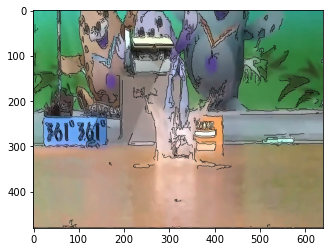

In [8]:
image = cv2.imread('/home/dl6/deep-learning-team6/1b/videoframes/all/Frames_video100/frame90.jpg')
im_b = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

im_bw = cv2.Canny(im_b, 10, 90)

contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, contours, -1, (0,0,0), 1)
plt.imshow(image)
plt.show()

In [10]:
im = cv2.imread('/home/dl6/deep-learning-team6/1b/videoframes/all/Frames_video100/frame95.jpg') 
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
ret,thresh = cv2.threshold(imgray,127,255,0) 

# Detect contours using both methods on the same image 
contours1, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
contours2, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 

# Copy over the original image to separate variables 
img1 = im.copy() 
img2 = im.copy() 

# Draw both contours onto the separate images 
cv2.drawContours(img1, contours1, -1, (255,0,0), 3) 
cv2.drawContours(img2, contours2, -1, (255,0,0), 3) 

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [ 48, 134,  80],
        [ 48, 134,  80],
        [ 48, 134,  80]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [ 48, 134,  80],
        [ 48, 134,  80],
        [ 48, 134,  80]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [ 48, 135,  79],
        [ 48, 135,  79],
        [ 48, 135,  79]],

       ...,

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

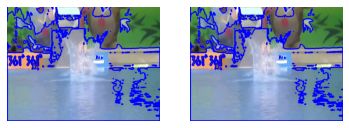

In [11]:
# Spawn a new figure 
plt.figure() 
# Show the first image on the left column 
plt.subplot(1,2,1) 
plt.imshow(img1[:,:,::-1]) 
# Turn off axis numbering 
plt.axis('off') 

# Show the second image on the right column 
plt.subplot(1,2,2) 
plt.imshow(img2[:,:,::-1]) 
# Turn off the axis numbering 
plt.axis('off') 

# Show the figure 
plt.show() 

In [ ]:
import cv2
import numpy as np

img = cv2.imread('/home/dl6/deep-learning-team6/1b/videoframes/all/Frames_video10/frame47.jpg')

while(1):

    # Take each frame

    # Convert BGR to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(img,img, mask= mask)

    cv2.imshow('frame',img)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()